# Scale height Sanity Checks

It's been a while since I created this, but I believe that this was originally part of a sanity check to understand how differences in the stellar disk might affect things.

In [1]:
%matplotlib inline

import numpy as np
import unyt
import matplotlib.pyplot as plt

from cholla_vis import ICs

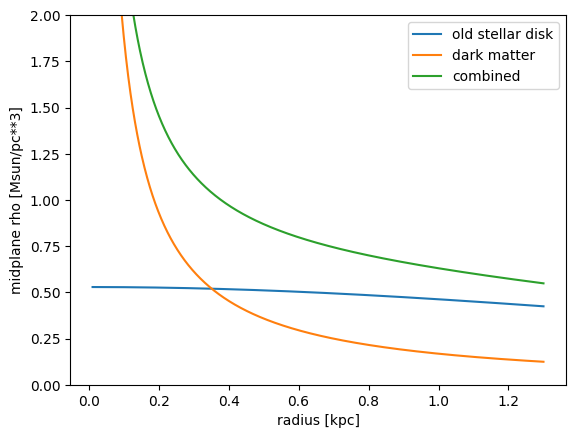

In [2]:
def _get_midplane_densities_oldstar_dmpotential(radii):
    tmp = ICs.get_defaults()    
    rho_disk = tmp['stellar_disk'].rho_msun_per_kpc3(radii.to('kpc').ndview, 0.0)
    rho_halo = tmp['halo'].rho_msun_per_kpc3(radii.to('kpc').ndview, 0.0)
    return (
        unyt.unyt_array(rho_disk, 'Msun/kpc**3').to('Msun/pc**3'),
        unyt.unyt_array(rho_halo, 'Msun/kpc**3').to('Msun/pc**3')
    )

def _plot():
    radii = unyt.unyt_array(np.linspace(0.01,1.3, num = 1001)[1:], 'kpc')
    rho_disk, rho_halo = _get_midplane_densities_oldstar_dmpotential(radii)
    fig,ax = plt.subplots(1,1)
    ax.plot(radii, rho_disk, label='old stellar disk')
    ax.plot(radii, rho_halo, label='dark matter')
    ax.plot(radii, rho_disk + rho_halo, label='combined')
    ax.set_xlabel('radius [kpc]')
    ax.set_ylabel('midplane rho [Msun/pc**3]')
    ax.legend()
    ax.set_ylim(0.0, 2.0)
_plot()